## Logistic Regression
### 1、Logistic Function
**logit----Logistic Regression起源**
> 一个事件的几率(odds)是指该事件发生与不发生的概率的比值。如果事件发生的概率是p，那么该事件的几率是$\frac{p}{1-p}$，该事件的对数几率(log odds)或logit函数是$$logit(p)=ln\frac{p}{1-p}$$

> $logit(p)$使得它在$p=0$或$p=1$附近，$p$的微小变化对应$logit(p)$的较大变化。

> 为了建立因变量$P$和自变量$X$之间的合理变化关系，假设存在线性关系$$P=X^T\beta$$通过“$logit(p)$使得它在$p=0$或$p=1$附近，$p$的微小变化对应$logit(p)$的较大变化。”这一性质来反应$P$，可得：
$$logit(p)=ln\frac{p}{1-p}=X^T\beta$$
$$\Rightarrow \frac{p}{1-p}=e^{X^T\beta}$$
$$\Rightarrow p=\frac{e^{X^T\beta}}{1+e^{X^T\beta}}$$

**Logistic Distribution**
> 设$X$是连续随机变量，$X$服从Logistic分布是指$X$具有下列分布函数和密度函数：$$F(X)=P(X\lt x)=\frac{1}{1+e^{-(x-\mu)/\gamma}}$$
$$f(x)=F^{'}(X)=\frac{e^{-(x-\mu)/\gamma}}{\gamma(1+e^{-(x-\mu)/\gamma }\;)^2}$$

> 式中，$\mu$为位置参数，$\gamma$为形状参数。

> Logistic Distribution 的密度函数$f(x)$和分布函数$F(x)$的图像如图1.6所示。分布函数属于Logistic函数，其图形是一条S形曲线(gigmoid curve).该曲线以点$(\mu, \frac{1}{2})$为中心对称，即满足$$F(-x+\mu)-\frac{1}{2}=-F(x-\mu)+\frac{1}{2}$$

> 曲线在中心附近增长速度较快，在两端增长速度较慢，现状参数$\gamma$的值越小，曲线在中心附近增长得越快.

<img src="./logistic.png" width = "400" height = "420"/>

### 2、构造预测函数
**Logistic函数**
> Logistic函数一般形式如下：
$$g(z)=\frac{1}{1+e^{-z}}$$
>> Logistic函数的一介导数(后面公式推导会用到)
>> $$g^{'}(z)=({\frac{1}{1+e^{-z}}})^{'}=\frac{e^{-z}}{(1+e^{-z})^2}=\frac{1}{1+e^{-z}}\cdot\frac{e^{-z}}{1+e^{-z}}=\frac{1}{1+e^{-z}}\cdot(1-\frac{1}{1+e^{-z}})=g(z)\cdot(1-g(z))$$ 
> 对于线性边界的情况，边界形式如下：
$$z=\theta^Tx=\theta_0x_0+\theta_1x_1+\cdots+\theta_nx_n=\sum^n_{i=0}\theta_ix_i$$
> 构造预测函数为：
$$h_{\theta}(x)=g(\theta^Tx)=\frac{1}{1+e^{-\theta^Tx}}$$
> 函数$h(x)$的值有特殊含义，它表示结果取1的概率，因此对于输入x分类结果为类别1和类别0的概率分别为：
$$\begin{align}
& P(Y=1|x;0)=h_{\theta}(x) \\
& P(Y=0|x;0)=1-h_{\theta}(x)
\end{align}$$

$$P(y|x;\theta)=({h_\theta(x)})^y(1-{h_\theta(x)})^{1-y}$$

**构造损失函数J（m个样本，每个样本具有n个特征）**
> Cost函数和J函数如下，它们是基于最大似然估计推导得到的：

$$\begin{align}
L(\theta)&=p(\vec{y}|X;\theta)=\prod^m_{i=1}p(y^{(i)}|x^{(i)};\theta) \\
&=\prod^m_{i=1}({{h_\theta(x^{(i)})})^y}^{(i)}(1-{{h_\theta(x)^{(i)}})^{1-y}}^{(i)}
\end{align}$$

> 对$L(\theta)$取对数，可得：
$$l(\theta)=log(L(\theta))=\sum^m_{i=1}y^{(i)}log(h_{\theta}(x^{(i)}))+(1-y^{(i)})log(1-h_{\theta}(x^{(i)}))$$

> 对$l(\theta)$求导：
$$\begin{align}
\frac{\partial {l(\theta)}} {\partial{\theta_j}}&=\sum^m_{i=1}(\frac{y^{(i)}}{h_{\theta}(x^{(i)})}-\frac{1-y^{(i)}}{1-h_{\theta}(x^{(i)})})\cdot \frac{\partial {h_{\theta}(x^{(i)})}} {\partial{\theta_j}} \\
&=\sum^m_{i=1}(\frac{y^{(i)}}{g(\theta^Tx^{(i)})}-\frac{1-y^{(i)}}{1-g(\theta^Tx^{(i)})})\cdot \frac{\partial {g(\theta^Tx^{(i)})}} {\partial{\theta_j}} \\
&=\sum^m_{i=1}(\frac{y^{(i)}}{g(\theta^Tx^{(i)})}-\frac{1-y^{(i)}}{1-g(\theta^Tx^{(i)})})\cdot g(\theta^Tx^{(i)})\cdot(1-g(\theta^Tx^{(i)}))\frac{\partial {\theta^Tx^{(i)}}} {\partial{\theta_j}} \\
&=\sum^m_{i=1}(\frac{y^{(i)}}{g(\theta^Tx^{(i)})}-\frac{1-y^{(i)}}{1-g(\theta^Tx^{(i)})})\cdot g(\theta^Tx^{(i)})\cdot(1-g(\theta^Tx^{(i)}))\frac{\partial {\theta^Tx^{(i)}}} {\partial{\theta_j}} \\
&=\sum^m_{i=1}(y^{(i)}(1-g(\theta^Tx^{(i)}))-(1-y^{(i)})g(\theta^Tx^{(i)}))\cdot x^{(i)}_j \\
&=\sum^m_{i=1}(y^{(i)}-g(\theta^Tx^{(i)}))\cdot x^{(i)}_j \\
\end{align}$$

**随机梯度下降算法**
> 由$\frac{\partial {l(\theta)}} {\partial{\theta_j}}=\sum^m_{i=1}(y^{(i)}-g(\theta^Tx^{(i)}))\cdot x^{(i)}_j$可得Logistic Regression的随机梯度下降算法表示如下：
$$\theta_j\;:=\theta_j+\alpha\sum^m_{i=1}(y^{(i)}-g(\theta^Tx^{(i)}))\cdot x^{(i)}_j $$

### 3、正则化
> 采用正则的原因可以参考Linear Regression中的正则化，这部分能容主要介绍Logistic Regression下的L1、L2正则。

**L1正则**
> 二元分类问题，响应变量$y\in\{0,1\}$，每次观测的$p$个预测变量值表示为向量$x=[1,\;x_1,\;x_2,\;\cdots,x_p]$，相应的响应变量后验概率为
$$p(y=1|x)=\varphi(\omega^Tx)=-\frac{1}{1+e^{-\omega^Tx}}$$
> 其中$\omega=[\omega_0,\;\omega_1,;\omega_2,\;\cdots,\;\omega_p,\;]$为回归模型参数。
> 假定存在训练样本$D_n=\{(x_i,\;y_i)\}^v_{i=1}$，根据训练样本数据及隶属类别$D_n$去估计$\omega$，优化问题的损失函数为对数似然函数(log-likelihood)，表示为
$$arg\;{max}_w\{log\;P(\omega|D_n)\}=arg\;{max}_w\{\sum^n_{i=1}y_i\;log(\varphi(\omega^Tx_i))+(1-y_i)log(1-\varphi(\omega^Tx_i))\}$$
> 通过在线“shooting”算法求解L1正则化的Logistic回归模型。
*算法：*
> 对于$x_i$，根据其目标值$y_i=1$或$y_i=0$时，其对数似然函数分别为$log\varphi(\omega^Tx_i)$和$log\varphi(1-\omega^Tx_i)$，对于上述任意一种情形，可以采用对数似然函数在$\omega^T_{i-1}x_i$邻域内的泰勒展开式去逼近，$\omega_{i-1}$为通过前$i-1$个样本估计得到的模型参数值，$c_i$是与$\omega$无关的函数，则对数似然函数近似值为：
$$\sum^n_{i=1}\;log(p(y_i|\omega))\approx\sum^n_{i=1}(a_i(\omega^Tx_i)^2+b_i(\omega^Tx_i)+c_i)=\omega^T\psi_t\omega+\omega^T\theta_t+\sum^n_{i=1}c_i $$
> 因此原优化问题转化为逼近的优化问题：
$$arg\;max_\omega\{log\;p(\omega|D_n)\}=arg\;max_\omega\{\omega^T\psi_n\omega+\omega^T\theta_n-\lambda||\omega||_1\}$$
> 其中，$\psi_n=\sum^n_{i=1}a_ix_ix^T_i$，$\theta_n=\sum^n_{i=1}b_ix_i$，定义$\Omega=2\psi^{'}\omega+\theta$，$a_i$，$b_i$由相应的对数似然函数在$\omega^T_{i-1}x_i$处的二阶泰勒展开式的系数获得。

>相应的“shooting”算法规则为：
>> 1)去迭代初始值$\omega_0$;

>> 2)在第$m$步，对所有$j=1$到$p$，令
>> $$\omega_j=\left\{
\begin{array}{ll}
0 & if \; |\Omega_j|\leq\lambda \\
\frac{\lambda-\Omega_j}{2\psi_{jj}} & if \; |\Omega_j|\gt\lambda \\
\frac{-\lambda-\Omega_j}{2\psi_{jj}} & if \; |\Omega_j|\lt -\lambda \\
\end{array} 
\right. $$
>> 经过p次计算，用新的估计值替换上一步的结果.

>> 3)重复第二步，直到$\omega_m$收敛.

**L2正则**

> Logistic回归与多重线性回归实际上有很多相同之处，最大的区别就在于它们的因变量不同，其他的基本都差不多。正是因为如此，这两种回归可以归于同一个家族，即广义线性模型（generalizedlinear model）。 
这一家族中的模型形式基本上都差不多，不同的就是因变量不同。这一家族中的模型形式基本上都差不多，不同的就是因变量不同。

> 如果是连续的，就是多重线性回归

> 如果是二项分布，就是Logistic回归

> 如果是Poisson分布，就是Poisson回归

> 如果是负二项分布，就是负二项回归

> 推导 ： http://blog.csdn.net/chibangyuxun/article/details/53148005

> Logistic Regression 就是一个被logistic方程归一化后的线性回归，仅此而已。

## Softmax Regression

## Max Entropy

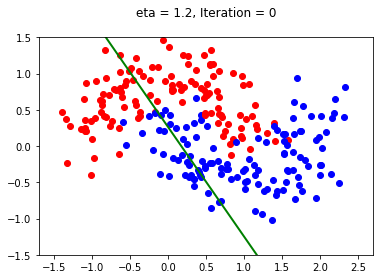

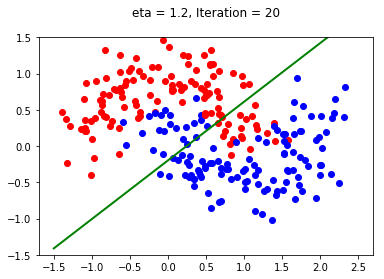

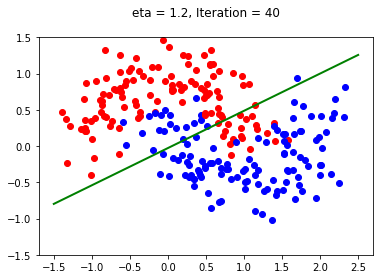

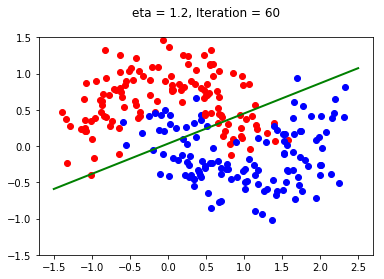

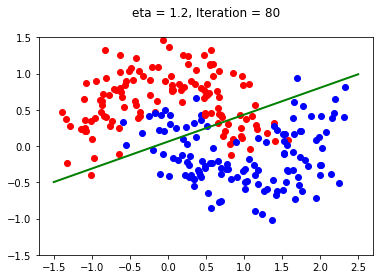

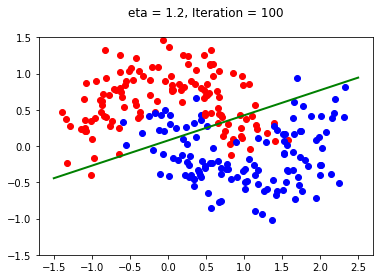

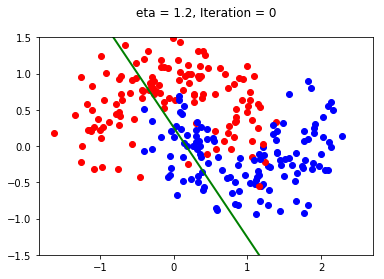

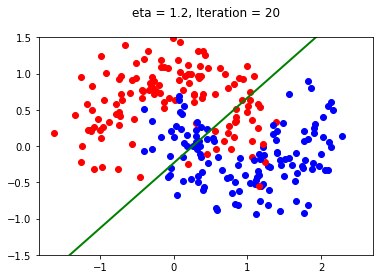

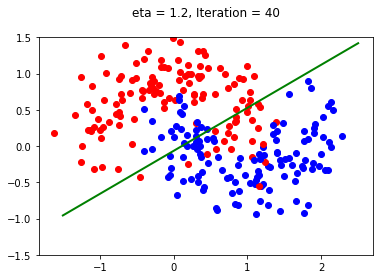

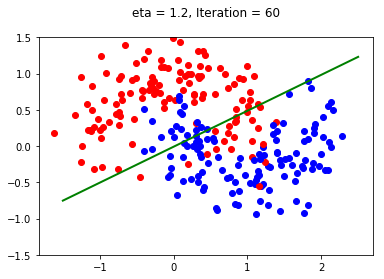

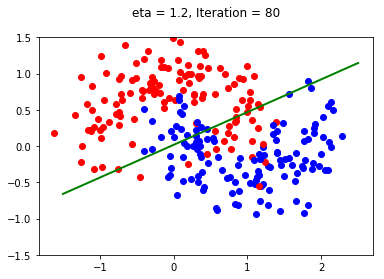

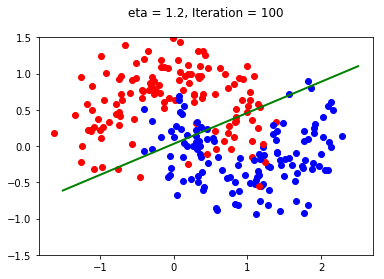

In [2]:
import numpy as np
from sklearn.datasets import make_moons

class LR:
    def __init__(self):
        self.dim = 2
        # self.w = np.random.random(self.dim)
        self.w = np.array([1.0,1.0])
        self.b = 0
        self.eta = 0.2


    def sigmoid(self, x):
        return 1.0/(1+np.exp(-x))

    def logistic_regression(self,x,y,eta):
        itr = 0
        self.eta = eta
        row, column = np.shape(x)
        xpts = np.linspace(-1.5, 2.5)
        while itr <= 100:
            fx = np.dot(self.w, x.T) + self.b
            hx = self.sigmoid(fx)
            t = (hx-y)
            s = [[i[0]*i[1][0],i[0]*i[1][1]] for i in zip(t,x)]
            gradient_w = np.sum(s, 0)/row * self.eta
            gradient_b = np.sum(t, 0)/row * self.eta
            self.w -= gradient_w
            self.b -= gradient_b
            ypts = (lr.w[0] * xpts + lr.b) / (-lr.w[1])
            if itr%20 == 0:
                plt.figure()
                for i in range(250):
                    plt.plot(x[i, 0], x[i, 1], col[y[i]] + 'o')
                plt.ylim([-1.5,1.5])
                plt.plot(xpts,ypts, 'g-', lw = 2)
                plt.title('eta = %s, Iteration = %s\n' % (str(eta), str(itr)))
                plt.savefig('p_N%s_it%s' % (str(row), str(itr)), dpi=200, bbox_inches='tight')
            itr += 1

if __name__ == '__main__':
    import matplotlib.pyplot as plt
    x, y = make_moons(250, noise=0.25)
    col = {0:'r',1:'b'}
    lr = LR()
    lr.logistic_regression(x,y,eta=1.2)
    plt.show()

https://www.cnblogs.com/sumai/p/5221067.html

https://github.com/appnexus/logistic-regression-L1/blob/master/logistic_regression_L1/logistic_regression_L1.py